# 최종분석과제(기말대체)   
## 201601368 제명수
#### 기말고사 대체 과제로, 이동통신 사용자 데이터 분석하기를 드립니다.
#### 각 컬럼에 대한 설명은 다음과 같습니다.

##### 정답은 없으니, 여러분이 배운 지식을 활용하여 다채로운 분석을 시도해보기 바랍니다.
##### 기한은 6/16 23:55까지이며, github 에 게시 후 링크를 제출합니다.
##### Github 제출 시, 꼭 상단에 자신의 이름을 쓰기 바랍니다.

##### 모두 고생 많았습니다.
##### 학기 마무리 건강히 하기 바랍니다.

In [1]:
##### Leave	가입해지여부(1이면 해지)
##### MemberWeeks	가입기간
##### NewContract	가입갱신여부(1이면 갱신)
##### IsData	데이터요금제사용여부(1이면 사용)
##### DataAmount	데이터사용량(GB)
##### Callcenter	고객센터전화량
##### CalMins	월평균전화량(분)
##### CalCounts	월평균전화수(횟수)
##### MonthlyFee	월평균요금
##### OverFee	초과요금
##### RoamingMin	로밍시간(분)

## 우선, 조사하고싶은 것을 먼저 정해보겠습니다! 그 후에 데이터를 뜯어보는게 좋을 것 같아요.
##### 지금 11가지 종류의 데이터가 있습니다.
##### 이 데이터들로, 무엇을 알아볼 수 있을까요?
##### 생각을 해봅시다 ~
#### 1. 가장 먼저, 데이터 크기를 줄여줍니다. category 형식과 int, float 형식들로 정리할 수 있겠죠?
#### 그리고
#### < 궁금한 것들 ? >
#### 2. 일단, 통신사는 (1) 새로 유입된 고객들과 (2) 기존 고객들 그리고, (3) 빠져나간 고객들 
##### 이렇게 세 종류의 고객들이 있겠죠?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

phone = pd.read_csv("C:/Users/chemy/Documents/프3/telco.csv")

##### (가입갱신여부) 을 가지고, 빠져나간 고객들을 볼 수 있겠죠. 0 이면 빠져나간 고객.  
##### 추가로, (가입갱신여부) = 1인데, (가입기간) = 짧으면, 새로 유입된 고객이라고 볼 수 있겠죠?
##### 그리고, (가입갱신여부) = 1인데, (가입기간) = 일정기간 이상인 기족 고객들이 있을 것입니다.
#### ★ 이 세 집단을  (old) (new) (ing) 으로 나눈 후에, 나머지 8가지 칼럼들에 대한, 각 집단별 특징들을 알아봅시다!
#### 그 때, 그래프도 그리면서, 알아보면 좋을 것 같습니다!

## ★★★  네. 처음에는, 이렇게 계획을 했었습니다. 
## 그런데, 뒤에 가서, 이게 잘못되었다는 것을 깨닿고 다시, 정했습니다!!   뒤에서 나옵니다...

In [3]:
phone                       # 일단, telco 데이터는 이런 구조로 되어있네요. 3333명의 고객정보가 들어있습니다.

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


In [4]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Leave        3333 non-null   int64  
 1   MemberWeeks  3333 non-null   int64  
 2   NewContract  3333 non-null   int64  
 3   IsData       3333 non-null   int64  
 4   DataAmount   3333 non-null   float64
 5   Callcenter   3333 non-null   int64  
 6   CalMins      3333 non-null   float64
 7   CalCounts    3333 non-null   int64  
 8   MonthlyFee   3333 non-null   float64
 9   OverFee      3333 non-null   float64
 10  RoamingMin   3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [5]:
phone.isna().sum()          # 결측치는 없군요.

Leave          0
MemberWeeks    0
NewContract    0
IsData         0
DataAmount     0
Callcenter     0
CalMins        0
CalCounts      0
MonthlyFee     0
OverFee        0
RoamingMin     0
dtype: int64

In [6]:
phone.Callcenter.max()         # int 8로 바꿔줍니다.

9

In [7]:
phone.Callcenter.min()

0

In [8]:
phone.MemberWeeks.max()       # unsigned int 8 : 0~255

243

In [9]:
phone.MemberWeeks.min()

1

In [10]:
phone.DataAmount.max()        # float 8 로

5.4

In [11]:
phone.DataAmount.min()

0.0

In [12]:
phone.CalMins.max()           # float 16 으로

350.8

In [13]:
phone.CalMins.min()

0.0

In [14]:
phone.CalCounts.max()        # 이것도 unsigned int 8

165

In [15]:
phone.CalCounts.min()

0

In [16]:
phone.MonthlyFee.max()       # flaot 16

111.3

In [17]:
phone.MonthlyFee.min()

14.0

In [18]:
phone.OverFee.max()         # flaot 16

18.19

In [19]:
phone.OverFee.min()

0.0

In [20]:
phone.RoamingMin.max()      # flaot 16

20.0

In [21]:
phone.RoamingMin.min()

0.0

##### < 이전 메모리 점검 >    

In [22]:
phone.info()       # 263.9 KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Leave        3333 non-null   int64  
 1   MemberWeeks  3333 non-null   int64  
 2   NewContract  3333 non-null   int64  
 3   IsData       3333 non-null   int64  
 4   DataAmount   3333 non-null   float64
 5   Callcenter   3333 non-null   int64  
 6   CalMins      3333 non-null   float64
 7   CalCounts    3333 non-null   int64  
 8   MonthlyFee   3333 non-null   float64
 9   OverFee      3333 non-null   float64
 10  RoamingMin   3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


##### 일단, leave, NewContract, IsData 세 항목들은 binary 형태이기 때문에, category 형식으로 바꿔주겠습니다.
##### 나머지 8가지 항목들도, 아무리 커봐야 1000단위는 안 될 것 같아서, 적당하게 줄여주겠습니다.

In [23]:
phone.Leave = phone.Leave.astype('int8')
phone.NewContract = phone.NewContract.astype('int8')
phone.IsData = phone.IsData.astype('int8')

phone.MemberWeeks = phone.MemberWeeks.astype('uint8')  # int 8로 해줬는데, 범위를 초과해서, 에러가 발생했습니다. uint8 로 합니다!!
phone.Callcenter = phone.Callcenter.astype('uint8')    # 마찬가지! 
phone.DataAmount = phone.DataAmount.astype('float16')  # float8 안됨..
phone.CalMins = phone.CalMins.astype('float16')
phone.CalCounts = phone.CalCounts.astype('uint8')
phone.MonthlyFee = phone.MonthlyFee.astype('float16')
phone.OverFee = phone.OverFee.astype('float16')    # float8 안됨..
phone.RoamingMin = phone.RoamingMin.astype('float16')  # float8 안됨..

##### < 이후 메모리 점검 >    

In [24]:
phone.info()     # 52.5 KB    5배 정도 줄었네요 ^^

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Leave        3333 non-null   int8   
 1   MemberWeeks  3333 non-null   uint8  
 2   NewContract  3333 non-null   int8   
 3   IsData       3333 non-null   int8   
 4   DataAmount   3333 non-null   float16
 5   Callcenter   3333 non-null   uint8  
 6   CalMins      3333 non-null   float16
 7   CalCounts    3333 non-null   uint8  
 8   MonthlyFee   3333 non-null   float16
 9   OverFee      3333 non-null   float16
 10  RoamingMin   3333 non-null   float16
dtypes: float16(5), int8(3), uint8(3)
memory usage: 52.2 KB


In [25]:
phone.Leave.value_counts(normalize=True)     # (가입해지 == 1) 고객이 약 15% 나 되는 것을 확인했습니다.

0    0.855086
1    0.144914
Name: Leave, dtype: float64

<AxesSubplot:ylabel='Frequency'>

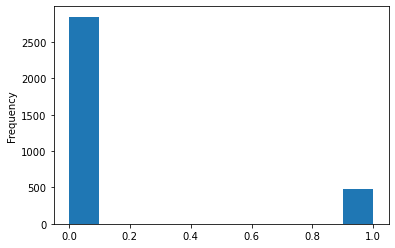

In [26]:
phone.Leave.plot(kind='hist')

In [27]:
phone.NewContract.value_counts(normalize=True)

1    0.90309
0    0.09691
Name: NewContract, dtype: float64

<AxesSubplot:ylabel='Frequency'>

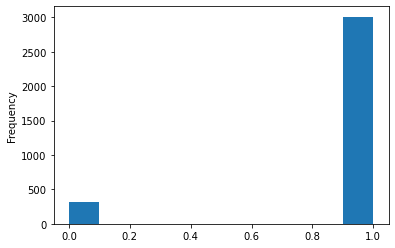

In [28]:
phone.NewContract.plot(kind='hist')

### NewContract (가입갱신 == 1) 고객은 약 90% 가 되네요. 왜 가입해지한 고객과 다를까요?
### 집고 넘어가야할 것이, NewContract 는 (갱신을 했냐, 안했냐) 가 아니라,
## ★★★ (신규 고객이냐, 갱신 고객이냐) 를 구분해주는 것 같습니다.

In [29]:
phone.MemberWeeks.value_counts(normalize=True)    # 비율  # 이제 마이너스 안 나오네요! 아까는 int8로 해줘서, 범위를 초과하는 바람에, 마이너스 값이 나왔습니다.

105    0.012901
87     0.012601
93     0.012001
101    0.012001
90     0.011701
         ...   
191    0.000300
199    0.000300
215    0.000300
221    0.000300
2      0.000300
Name: MemberWeeks, Length: 212, dtype: float64

In [30]:
phone.MemberWeeks.value_counts(normalize=False)    # 갯수

105    43
87     42
93     40
101    40
90     39
       ..
191     1
199     1
215     1
221     1
2       1
Name: MemberWeeks, Length: 212, dtype: int64

In [31]:
phone.MemberWeeks.min()

1

In [32]:
phone.MemberWeeks.nunique()

212

In [33]:
phone.MemberWeeks

0       128
1       107
2       137
3        84
4        75
       ... 
3328    192
3329     68
3330     28
3331    184
3332     74
Name: MemberWeeks, Length: 3333, dtype: uint8

<AxesSubplot:ylabel='Frequency'>

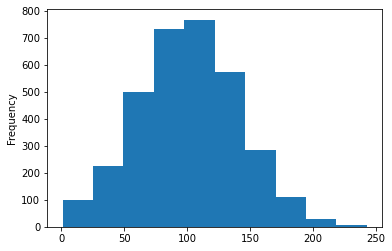

In [34]:
phone.MemberWeeks.plot(kind='hist')     

### 가입기간 평균은 100주 에 몰려있네요.


### ★ 이제, old new ing 를 나누기위해, 데이터를 살펴보겠습니다.

In [35]:
phone[phone['Leave'] == 0][phone['NewContract'] == 0]      # (가입해지 X) && ()

<ipython-input-35-64c09ad26de2>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phone[phone['Leave'] == 0][phone['NewContract'] == 0]      # (가입해지 X) && ()


,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
3,0,84,0,0,0.000000,2,299.500,71,57.00000,3.099609,6.601562
4,0,75,0,0,0.000000,3,166.750,113,41.00000,7.421875,10.101562
5,0,118,0,0,0.000000,0,223.375,98,57.00000,11.031250,6.300781
7,0,147,0,0,0.000000,0,157.000,79,36.00000,5.160156,7.101562
9,0,141,0,1,3.019531,0,258.500,84,93.18750,11.101562,11.203125
...,...,...,...,...,...,...,...,...,...,...,...
3269,0,117,0,0,0.000000,1,198.375,121,55.00000,12.476562,10.500000
3302,0,75,0,0,0.290039,1,153.250,78,46.90625,10.539062,7.800781
3309,0,100,0,0,0.000000,4,219.375,112,57.00000,11.289062,12.000000
3317,0,163,0,0,0.000000,1,197.250,90,50.00000,9.429688,7.800781


#### (Leave = 0 즉, 가입해지 하지않고) && (NewContract = 1, 가입갱신을 한)  사람들을 뽑아봤습니다.

## ★★★ 여기서, 중요한 의문이 하나 생깁니다! 
#### 여기서, 중요하게 고려해야할 사항이 NewContract = (가입갱신) 인데,
#### NewContract = 1 이 (신규) 고, 0 이 (갱신) 이냐?
#### 아니면, NewContract = 0 이 (신규) 이고, 1 이 (갱신) 이냐?

## ★
#### 처음에는, 제가 (Leave = 0)(가입해지 X) 이면, (NewContract = 1)(가입갱신여부 O)
#### 또, (Leave = 1)(가입해지 O) 이면, (NewContract = 0)(가입갱신여부 X) 라고 생각했습니다...
### ★ 그러나, (Leave) (NewContract) (MemberWeeks) 는 아예 별개로 생각해야하는 칼럼들이었습니다!
#### 즉,

In [36]:
phone[phone['Leave'] == 0][phone['NewContract'] == 0]                 # Leave = 0 인데,  NewContract = 0 인 것도 있음.

<ipython-input-36-3cdb5d2fce7f>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phone[phone['Leave'] == 0][phone['NewContract'] == 0]                 # Leave = 0 인데,  NewContract = 0 인 것도 있음.


,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
3,0,84,0,0,0.000000,2,299.500,71,57.00000,3.099609,6.601562
4,0,75,0,0,0.000000,3,166.750,113,41.00000,7.421875,10.101562
5,0,118,0,0,0.000000,0,223.375,98,57.00000,11.031250,6.300781
7,0,147,0,0,0.000000,0,157.000,79,36.00000,5.160156,7.101562
9,0,141,0,1,3.019531,0,258.500,84,93.18750,11.101562,11.203125
...,...,...,...,...,...,...,...,...,...,...,...
3269,0,117,0,0,0.000000,1,198.375,121,55.00000,12.476562,10.500000
3302,0,75,0,0,0.290039,1,153.250,78,46.90625,10.539062,7.800781
3309,0,100,0,0,0.000000,4,219.375,112,57.00000,11.289062,12.000000
3317,0,163,0,0,0.000000,1,197.250,90,50.00000,9.429688,7.800781


In [37]:
phone[phone['Leave'] == 1][phone['NewContract'] == 1]                 # Leave = 1 인데,  NewContract = 1 인 것도 있음.

<ipython-input-37-b8ea325844c8>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phone[phone['Leave'] == 1][phone['NewContract'] == 1]                 # Leave = 1 인데,  NewContract = 1 인 것도 있음.


,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
10,1,65,1,0,0.290039,4,129.12500,137,44.90625,11.429688,12.703125
15,1,161,1,0,0.000000,4,333.00000,67,84.00000,15.890625,5.398438
21,1,77,1,0,0.000000,5,62.40625,89,26.00000,8.500000,5.699219
33,1,12,1,0,0.000000,1,249.62500,118,64.00000,12.617188,11.796875
48,1,119,1,0,0.000000,5,159.12500,114,47.00000,11.570312,8.796875
...,...,...,...,...,...,...,...,...,...,...,...
3280,1,76,1,0,0.000000,4,107.31250,140,39.00000,11.906250,10.000000
3287,1,170,1,1,2.939453,4,199.50000,119,75.37500,6.750000,10.898438
3301,1,84,1,0,0.000000,0,280.00000,113,65.00000,10.109375,10.398438
3322,1,62,1,0,0.000000,4,321.00000,105,78.00000,13.281250,11.500000


#### 이런 식으로 말이죠.
#### 이게 무슨 말이냐?
# ★★★★★★★★★★ 
#### old = 가입했었던 사람들
#### new = 신규가입자
#### ing = 기존에 이미 가입되어있던 사람들

#### leave = 1 이면, 무조건 old. (지금은 회원이 아님. 다른 통신사로 갔음.)
#### leave = 0 중에, NewContract = 0 이면 (신규), NewContract = 1 이면 (갱신)

##### 예를 들어, 봅시다.
##### (윤성)이가 SKT 를 사용중입니다. 현재 2년 약정에 가입되어있죠. 그런데 2주 뒤면, 약정이 끝나게 됩니다.
##### 이제, 2주가 지났습니다.
##### (윤성)이는 (1) 2년 약정을 다시 할 수도 있고, (2) 약정없이, 그냥 써도 되고, (3) 다른 통신사로 가도 됩니다.
##### (1), (2)는 leave = 0 이고, NewContract는 모릅니다. ★★★★★ 왜냐하면, 현재 고객들중에, 아직 갱신을 하지 않은 (신규 가입자)(NewContract = 0) 가 있을 수 있습니다.
##### 또, 갱신을 하고 (NewContract = 1), 계속 이용중인 고객도 있을 수 있기 때문입니다.
##### (3)은 leave = 1, NewContract은 모릅니다. ★★★★★ 마찬가지로, 갱신을 하고나서, 약정 중간에 혹은 약정이 끝난 뒤에, 다른 통신사 이동했을 수도 있는 겁니다!!

In [38]:
phone[phone['Leave'] == 0][phone['NewContract'] == 0][phone['MemberWeeks'] <= 10]

<ipython-input-38-d0555e49f164>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phone[phone['Leave'] == 0][phone['NewContract'] == 0][phone['MemberWeeks'] <= 10]
<ipython-input-38-d0555e49f164>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  phone[phone['Leave'] == 0][phone['NewContract'] == 0][phone['MemberWeeks'] <= 10]


,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
2309,0,4,0,0,0.00000,0,145.25,89,51.00000,15.1875,8.898438
2467,0,3,0,0,0.26001,1,161.00,96,51.59375,12.2500,7.699219


In [39]:
phone.MemberWeeks.describe()

count    3333.000000
mean      101.064806
std        39.822106
min         1.000000
25%        74.000000
50%       101.000000
75%       127.000000
max       243.000000
Name: MemberWeeks, dtype: float64

##### 이 (MemberWeeks) 평균이 100 정도 이고, 25% 가 74 정도에서 짤리네요.
##### 70 정도에서 끈어보겠습니다.

In [40]:
old = phone[phone['Leave'] == 1]
new = phone[(phone['Leave'] == 0) & (phone['NewContract'] == 0) & (phone['MemberWeeks'] <= 70)]
ing = phone[(phone['Leave'] == 0) & (((phone['NewContract'] == 0) & (phone['MemberWeeks'] > 70)) | (phone['NewContract'] == 1))]

In [41]:
old        # 483 명

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
10,1,65,1,0,0.290039,4,129.12500,137,44.90625,11.429688,12.703125
15,1,161,1,0,0.000000,4,333.00000,67,84.00000,15.890625,5.398438
21,1,77,1,0,0.000000,5,62.40625,89,26.00000,8.500000,5.699219
33,1,12,1,0,0.000000,1,249.62500,118,64.00000,12.617188,11.796875
41,1,135,0,1,3.939453,0,173.12500,85,86.37500,10.203125,14.601562
...,...,...,...,...,...,...,...,...,...,...,...
3301,1,84,1,0,0.000000,0,280.00000,113,65.00000,10.109375,10.398438
3304,1,71,0,0,0.000000,4,186.12500,114,49.00000,9.929688,13.796875
3320,1,122,0,0,0.300049,4,140.00000,101,44.00000,9.820312,9.703125
3322,1,62,1,0,0.000000,4,321.00000,105,78.00000,13.281250,11.500000


In [42]:
new

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
66,0,43,0,0,0.000000,0,251.50000,105,61.00000,10.640625,9.296875
231,0,63,0,1,2.970703,1,199.00000,110,88.68750,14.570312,11.000000
358,0,37,0,1,2.480469,1,149.75000,122,68.81250,10.562500,9.203125
553,0,61,0,0,0.000000,2,78.18750,103,30.00000,9.796875,10.101562
572,0,44,0,0,0.000000,1,62.31250,92,34.00000,13.750000,10.796875
716,0,57,0,1,3.080078,2,234.50000,130,87.81250,9.757812,11.398438
808,0,61,0,1,3.050781,0,143.50000,76,76.50000,12.132812,11.296875
837,0,64,0,1,2.189453,0,127.18750,93,57.90625,8.148438,8.101562
842,0,67,0,0,0.000000,2,120.87500,58,41.00000,11.750000,11.398438
1005,0,12,0,0,0.000000,2,216.75000,117,47.00000,5.828125,9.796875


In [43]:
len(new)      # 40 명

40

In [44]:
ing          # 2810 명

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
0,0,128,1,1,2.699219,1,265.000,110,89.00000,9.867188,10.000000
1,0,107,1,1,3.699219,1,161.625,123,82.00000,9.781250,13.703125
2,0,137,1,0,0.000000,0,243.375,114,52.00000,6.058594,12.203125
3,0,84,0,0,0.000000,2,299.500,71,57.00000,3.099609,6.601562
4,0,75,0,0,0.000000,3,166.750,113,41.00000,7.421875,10.101562
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.669922,2,156.250,77,71.68750,10.781250,9.898438
3329,0,68,1,0,0.340088,3,231.125,57,56.40625,7.671875,9.601562
3330,0,28,1,0,0.000000,2,180.750,109,56.00000,14.437500,14.101562
3331,0,184,0,0,0.000000,2,213.750,105,50.00000,7.980469,5.000000


In [45]:
old.describe()

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
count,483.0,483.000000,483.000000,483.000000,483.000000,483.000000,483.000,483.000000,483.0000,483.000000,483.000000
mean,1.0,102.664596,0.716356,0.165631,0.546875,2.229814,inf,101.335404,59.1875,10.625000,10.703125
std,0.0,39.467820,0.451233,0.372135,1.155273,1.853275,69.000,21.582307,16.0625,2.585938,2.792969
min,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,14.0000,3.550781,2.000000
25%,1.0,76.000000,0.000000,0.000000,0.000000,1.000000,153.250,87.500000,45.0000,8.863281,8.796875
50%,1.0,103.000000,1.000000,0.000000,0.000000,2.000000,217.625,103.000000,63.0000,10.570312,10.601562
75%,1.0,127.000000,1.000000,0.000000,0.295044,4.000000,266.000,116.500000,69.0000,12.472656,12.796875
max,1.0,225.000000,1.000000,1.000000,5.398438,9.000000,350.750,165.000000,110.0000,18.187500,20.000000


In [46]:
new.describe()

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
count,40.0,40.000000,40.0,40.000000,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000
mean,0.0,46.725000,0.0,0.350000,0.971680,1.250000,173.62500,97.050000,56.562500,9.890625,9.656250
std,0.0,18.261614,0.0,0.483046,1.323242,0.980581,57.15625,19.473783,18.375000,2.458984,2.070312
min,0.0,3.000000,0.0,0.000000,0.000000,0.000000,62.31250,55.000000,28.000000,5.828125,4.500000
25%,0.0,37.000000,0.0,0.000000,0.000000,0.750000,139.96875,83.750000,44.000000,8.134766,8.203125
50%,0.0,54.500000,0.0,0.000000,0.000000,1.000000,167.37500,97.000000,53.906250,9.664062,9.750000
75%,0.0,61.000000,0.0,1.000000,2.415527,2.000000,220.81250,110.500000,69.453125,11.820312,11.296875
max,0.0,68.000000,0.0,1.000000,3.320312,3.000000,307.00000,140.000000,98.625000,15.187500,13.000000


In [47]:
ing.describe()

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
count,2810.0,2810.000000,2810.000000,2810.000000,2810.000000,2810.000000,2810.00000,2810.000000,2810.000000,2810.000000,2810.000000
mean,0.0,101.563345,0.948043,0.294662,0.860352,1.452669,inf,100.329181,inf,9.953125,10.164062
std,0.0,39.577770,0.221980,0.455972,1.286133,1.166185,50.09375,19.805377,16.421875,2.515625,2.792969
min,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,15.703125,0.000000,0.000000
25%,0.0,74.000000,1.000000,0.000000,0.000000,1.000000,143.12500,87.000000,45.000000,8.226562,8.398438
50%,0.0,101.000000,1.000000,0.000000,0.000000,1.000000,177.25000,100.500000,53.000000,9.992188,10.203125
75%,0.0,128.000000,1.000000,1.000000,2.000000,2.000000,210.09375,114.000000,64.468750,11.656250,12.000000
max,0.0,243.000000,1.000000,1.000000,4.750000,8.000000,315.50000,163.000000,111.312500,18.093750,18.906250


# ★★★★★
## 자! 이제, 10가지 칼럼들에 대해, old new ing 세 집단을 비교해보겠습니다!

#### old = (옛날 고객) = (지금은 X)
#### new = (신규 고객)
#### ing = (기존 고객) = (지금도 O)

### 1. MemberWeeks 비교

<AxesSubplot:ylabel='Frequency'>

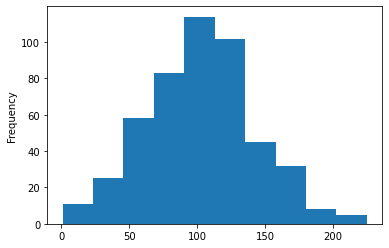

In [48]:
old.MemberWeeks.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

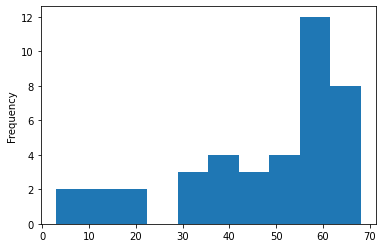

In [49]:
new.MemberWeeks.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

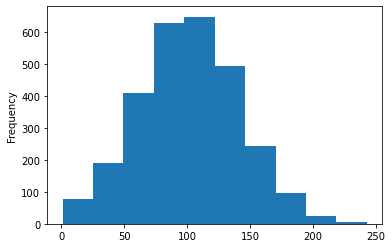

In [50]:
ing.MemberWeeks.plot(kind='hist')

#### 아까 위에서, 정리한대로, new 는 전부 70 이하이고, old 와 ing 는 매우 비슷한 띄는 것을 알 수 있습니다!!

### 2. IsData 비교
##### : 데이터요금제사용여부(1이면 사용)

<AxesSubplot:ylabel='Frequency'>

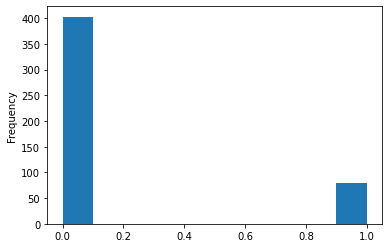

In [51]:
old.IsData.plot(kind='hist')

In [52]:
old.IsData.value_counts(normalize=True)

0    0.834369
1    0.165631
Name: IsData, dtype: float64

<AxesSubplot:ylabel='Frequency'>

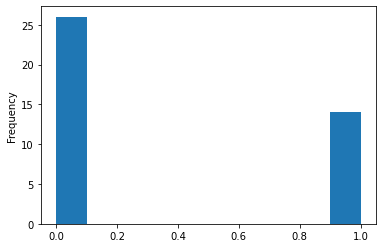

In [53]:
new.IsData.plot(kind='hist')

In [54]:
new.IsData.value_counts(normalize=True)

0    0.65
1    0.35
Name: IsData, dtype: float64

<AxesSubplot:ylabel='Frequency'>

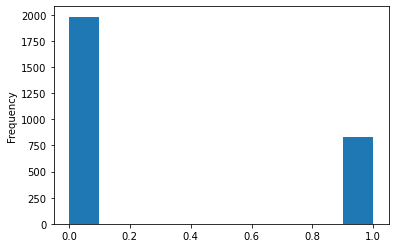

In [55]:
ing.IsData.plot(kind='hist')

In [56]:
ing.IsData.value_counts(normalize=True)

0    0.705338
1    0.294662
Name: IsData, dtype: float64

#### 공통점 : 모두, 과반수가 데이터요금제를 사용하는 것으로 나왔습니다.
#### 차이점 : (데이터요금제O, X) 
#### old = (83%, 17%) new = (65%, 35%) ing = (71%, 29%)
#### >>> (옛날 고객) 의 데이터 요금제 사용이 가장 컸고, 그리고 (기존 고객), 마지막으로 (신규 고객) 순으로 데이터 사용량이 줄어듭니다.

### 3. NewContract 비교
###### : 가입갱신여부(1이면 갱신)

<AxesSubplot:ylabel='Frequency'>

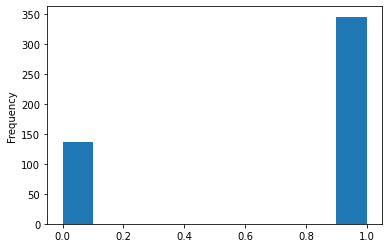

In [57]:
old.NewContract.plot(kind='hist')

In [58]:
old.NewContract.value_counts(normalize=True)

1    0.716356
0    0.283644
Name: NewContract, dtype: float64

<AxesSubplot:ylabel='Frequency'>

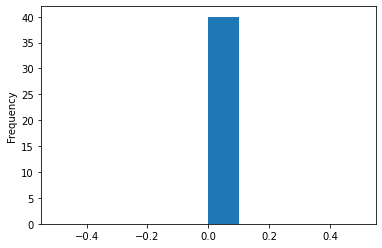

In [59]:
new.NewContract.plot(kind='hist')

In [60]:
new.NewContract.value_counts(normalize=True)

0    1.0
Name: NewContract, dtype: float64

<AxesSubplot:ylabel='Frequency'>

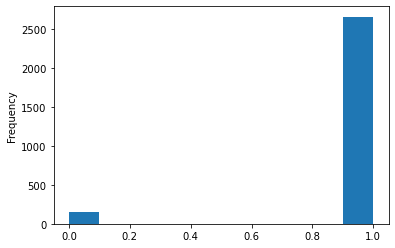

In [61]:
ing.NewContract.plot(kind='hist')

In [62]:
ing.NewContract.value_counts(normalize=True)

1    0.948043
0    0.051957
Name: NewContract, dtype: float64

#### 공통점 : 모두, 과반수가 (가입갱신) 을 한 것으로 나타났습니다.
#### 차이점 : (1) 당연한 이야기지만, (신규고객) 은 모두 (가입갱신) (X) 하지 않은 것으로 나왔습니다.
#### (2) : (기존 고객) 은 압도적으로, (가입 갱신)을 많이 한 것으로 나타났습니다.  >>> 이것도 사실, 당연한 얘기죠?
#### (3) : (옛날 고객) 은 71% 정도 (가입 갱신)을 했던 것으로 나타났습니다.

#### ★ 여기서 잠깐!  궁금해집니다.
#### (옛날 고객) 들중에 (가입 갱신)을 하지 않은 고객들은, 어떤 특징이 있을까요?
##### >>> 1. 약정 갱신을 귀찮아서 안한 케이스
##### >>> 2. 약정 갱신을 할 수 있는지 모르거나 (거의 없겠지만,,ㅎㅎ)
##### >>> 3. 약정 2년이 지났지만, 쓰던 폰을 3년, 4년.. 계속 사용하는 케이스.
##### >>> 4. 또, 요금할인을 모르고, 약정 갱신을 안하는 사람들.  
##### 도 있을 것 같습니다.
##### ★ 1,2,3,4 케이스 

### 4. DataAmount   
##### : 데이터사용량(GB)

<AxesSubplot:ylabel='Frequency'>

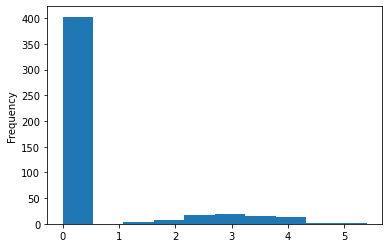

In [63]:
old.DataAmount.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

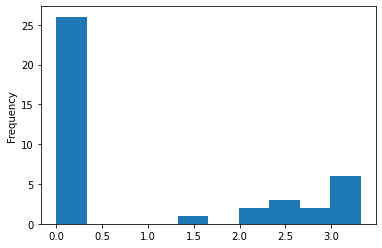

In [64]:
new.DataAmount.plot(kind='hist')

#### 특이하게, new = (신규 고객) 만, 데이터사용량이 3기가가 넘는 사람의 비율이 10%정도 돼 보입니다.

<AxesSubplot:ylabel='Frequency'>

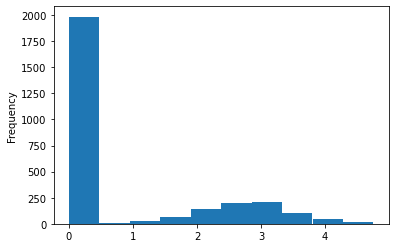

In [65]:
ing.DataAmount.plot(kind='hist')

## DataAmounts 에서, 데이터 = 0 의 비중이 90프로가 넘죠?  너무 큽니다!
# ★★★ 0 빼고 보겠습니다!

In [66]:
cellphone = phone[phone['DataAmount'] > 1]         # 1 이상만 따로 남기기.

<AxesSubplot:ylabel='Frequency'>

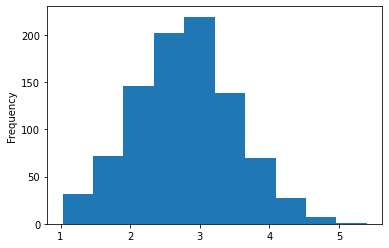

In [67]:
cellphone.DataAmount.plot(kind='hist')

In [68]:
cellphone2 = cellphone.DataAmount.apply(pd.Series.value_counts, bins=[i for i in range(1, 7)]).sum(axis=0)

In [69]:
cellphone2.sort_index(ascending=True)

(0.999, 2.0]    131
(2.0, 3.0]      433
(3.0, 4.0]      307
(4.0, 5.0]       41
(5.0, 6.0]        1
dtype: int64

In [70]:
cellphone2 = cellphone2.sort_index(ascending=True)

C:\Users\chemy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chemy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\chemy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 48708 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\chemy\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 50984 missing from current font.
  font.set_text(s, 0, flags=flags)


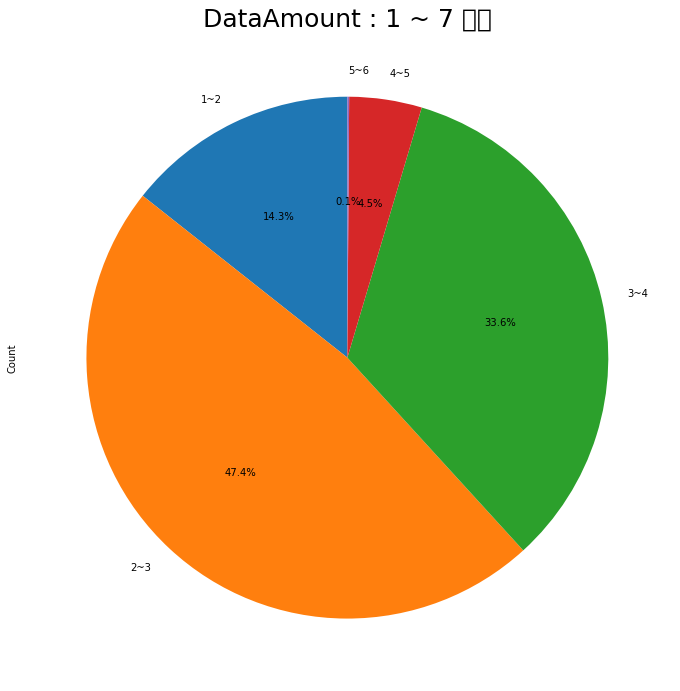

In [71]:
pie_chart = cellphone2.plot.pie(autopct='%0.1f%%', figsize=(12, 12), labels=['1~2', '2~3', '3~4', '4~5', '5~6'], startangle = 90, textprops={'fontsize': 10})
pie_chart.set_title('DataAmount : 1 ~ 7 비율', size=25)
pie_chart.set_ylabel('Count')
plt.rcParams["font.family"] = 'Malgun Gothic'

#### 1인당 데이터 사용량의 모습은, 2~3 기가 정도 사용하는 사람이 47% 나 되구요.
#### 그 다음, 3~4 기가 = 33%, 
#### 1~2 기가 = 14% 
#### 4~5 기가 = 4.5%
#### 5~6 기가 = 0.1% 입니다.

### 5. Callcenter   
##### : 고객센터전화량

<AxesSubplot:ylabel='Frequency'>

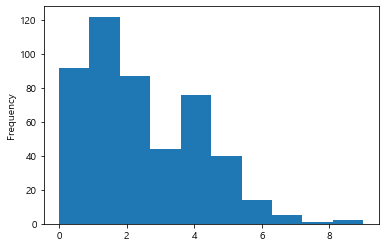

In [72]:
old.Callcenter.plot(kind='hist')

In [73]:
old.Callcenter.value_counts(ascending=False)

1    122
0     92
2     87
4     76
3     44
5     40
6     14
7      5
9      2
8      1
Name: Callcenter, dtype: int64

<AxesSubplot:ylabel='Frequency'>

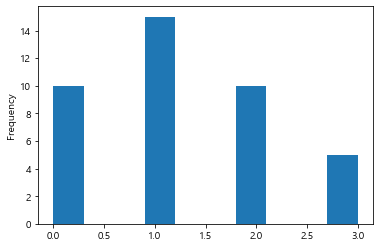

In [74]:
new.Callcenter.plot(kind='hist')

In [75]:
new.Callcenter.value_counts(ascending=False)

1    15
2    10
0    10
3     5
Name: Callcenter, dtype: int64

<AxesSubplot:ylabel='Frequency'>

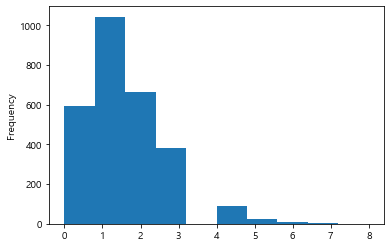

In [76]:
ing.Callcenter.plot(kind='hist')

In [77]:
ing.Callcenter.value_counts(ascending=False)

1    1044
2     662
0     595
3     380
4      90
5      26
6       8
7       4
8       1
Name: Callcenter, dtype: int64

##### 의외의 결과가 나왔습니다.
##### (new) (신규 고객) 들은 아무리 많이 전화를 했어도, 3번을 넘지 않네요.
##### >>> 서비스 만족했기 때문에, 전화를 덜 했으리라 추정해봅니다.
##### 물론, (old) (ing) 역시, (0,1,2,3) 의 비중이 매우 크지만,
##### 4,5,6,7,8, 많으면 9회까지 나온 것을 볼 수 있습니다.
##### 참고로, 9회 가 나온 칼럼은, 유일하게 (old) (2명) 입니다.
##### >>> 서비스에 불만족해서, 9번이나 전화했겠죠?  그러니까, 통신사를 옮겼을 것이구요.

### 6. CalMins
##### : 월평균전화량(분)

<AxesSubplot:ylabel='Frequency'>

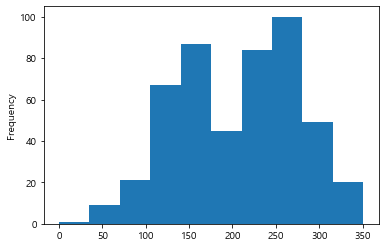

In [78]:
old.CalMins.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

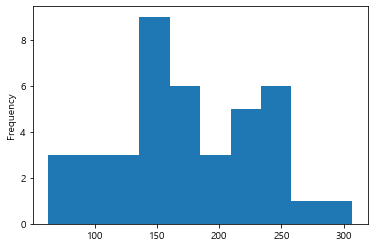

In [79]:
new.CalMins.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

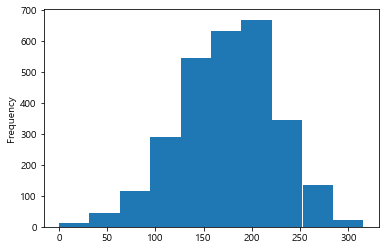

In [80]:
ing.CalMins.plot(kind='hist')

##### (old) 와 (ing) 는 월평균전화량 히스토그램이 매우 흡사한, 정규분포 모양을 띄는 것을 알 수 있습니다.
##### 그런데, (new) 는 약간 다르게, (0~135분 정도까지) 앞부분이죠? 상대적으로 높은 비중을 차지하는 것을 볼 수 있습니다. 

### 7. CalCounts
##### : 월평균전화수(횟수)

<AxesSubplot:ylabel='Frequency'>

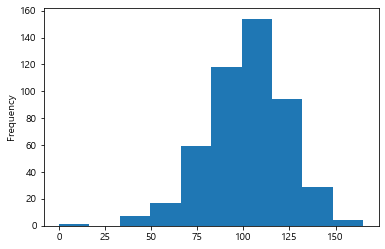

In [81]:
old.CalCounts.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

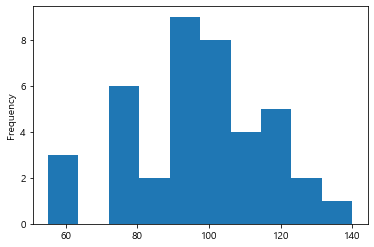

In [82]:
new.CalCounts.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

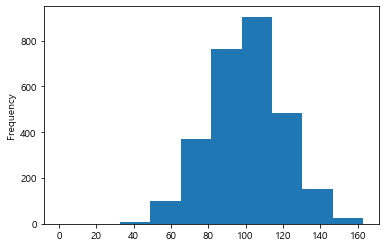

In [83]:
ing.CalCounts.plot(kind='hist')

In [84]:
old.CalCounts.min()

0

In [85]:
new.CalCounts.min()

55

In [86]:
ing.CalCounts.min()

0

##### 아까 (new) 를 정의할 때, phone['MemberWeeks'] <= 70   라고 했기 때문에,
##### (통화횟수)에 0인 값이 아예 없는, 약간의 오차가 발생한 것 같습니다. 

### 8. MonthlyFee
##### : 월평균요금

<AxesSubplot:ylabel='Frequency'>

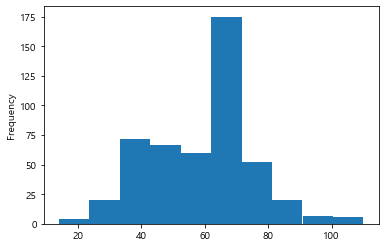

In [87]:
old.MonthlyFee.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

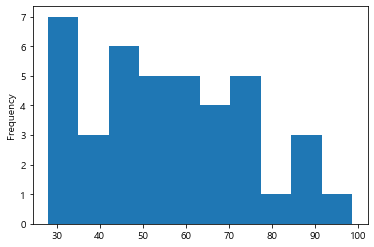

In [88]:
new.MonthlyFee.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

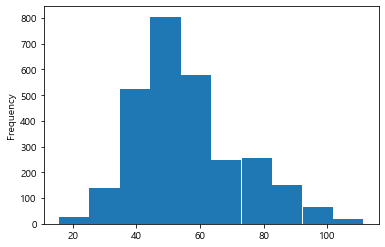

In [89]:
ing.MonthlyFee.plot(kind='hist')

In [90]:
new.MonthlyFee.max()

98.6

In [91]:
old.MonthlyFee.max()

110.0

In [92]:
ing.MonthlyFee.max()

111.3

### 9. OverFee
##### : 초과요금

<AxesSubplot:ylabel='Frequency'>

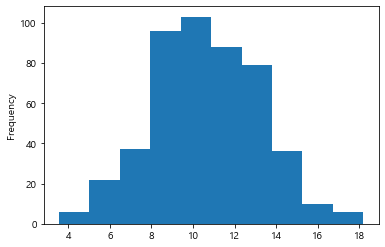

In [93]:
old.OverFee.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

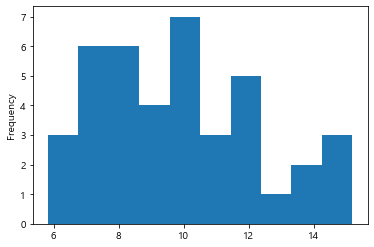

In [94]:
new.OverFee.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

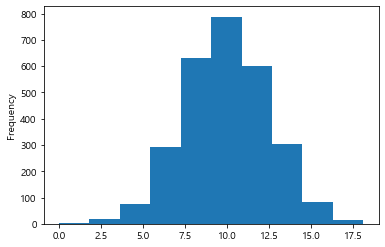

In [95]:
ing.OverFee.plot(kind='hist')

##### (old) 와 (new) 는 분포가 비슷한 것을 분명하게 확인할 수 있습니다.
##### (new) 는 약간 특이하지만, 크게 다르지 않아 보입니다.

### 10. RoamingMin
##### : 로밍시간(분)

<AxesSubplot:ylabel='Frequency'>

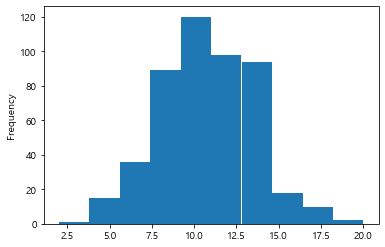

In [96]:
old.RoamingMin.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

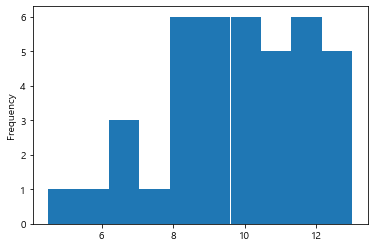

In [97]:
new.RoamingMin.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

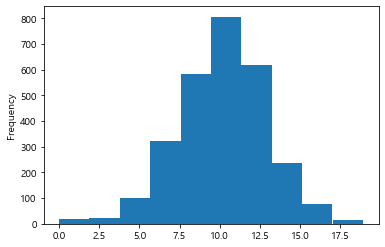

In [98]:
ing.RoamingMin.plot(kind='hist')

In [99]:
old.RoamingMin.describe()

count    483.000000
mean      10.703125
std        2.792969
min        2.000000
25%        8.796875
50%       10.601562
75%       12.796875
max       20.000000
Name: RoamingMin, dtype: float64

In [100]:
new.RoamingMin.describe()

count    40.000000
mean      9.656250
std       2.070312
min       4.500000
25%       8.203125
50%       9.750000
75%      11.296875
max      13.000000
Name: RoamingMin, dtype: float64

In [101]:
ing.RoamingMin.describe()

count    2810.000000
mean       10.164062
std         2.792969
min         0.000000
25%         8.398438
50%        10.203125
75%        12.000000
max        18.906250
Name: RoamingMin, dtype: float64

#### 평균과 표준편차가 비슷한 것을 보고, 데이터를 그럭저럭 잘 나눴음을 확인할 수 있습니다.

#### ★ 지금까지 나온 분석 결과들을 취합하여 잘 정리한다면, (이동통신사) 에서, 수익을 내기 위한 프로젝트를 만들기 위해서, 
#### 혹은 고객별로 차별화된 마케팅 전략을 수립하는 데에도, 잘~ 사용될 수 있으리라 생각이 듭니다.
#### 또, 다른 데이터들도 이런 식으로 정리해보면, 새로운 인사이트를 얻을 수 있을 것 같습니다.

### 이상 분석을 마치겠습니다!
### 감사합니다!